# Correlacion
#### Examina las correlaciones entre los datos del modelo y los de la boya para determinar cómo se relacionan entre sí.

In [2]:
import xarray as xr
import pandas as pd
import seaborn as sns

In [31]:
def get_data(name):
    boya = xr.open_dataset(f'data/processed/boya_{name}_Ext.nc')
    copernicus = xr.open_dataset(f'data/processed/IBI_REANALYSIS_WAV_005_006_{name}.nc')
    gow = xr.open_dataset(f'data/processed/GOW_CFS_{name}.nc')
    
    return boya, copernicus, gow

### Cargar los datos y Calcular la matriz de correlación

<Axes: >

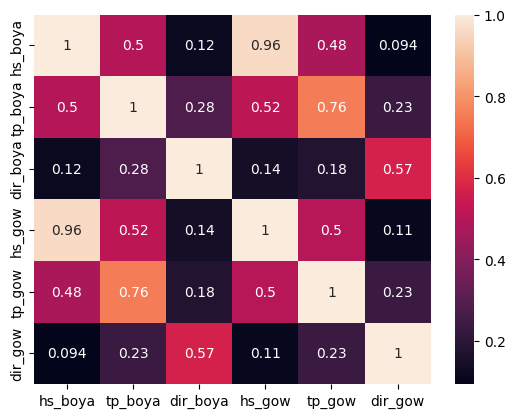

In [29]:
name = 'Bilbao-Vizcaya'
boya, _, gow = get_data(name)

df = pd.DataFrame({'hs_boya': boya.hs,
                   'tp_boya': boya.tp,
                   'dir_boya': boya.dir,
                   'hs_gow': gow.hs,
                   'tp_gow': gow.tp,
                   'dir_gow': gow.dir
                  })
sns.heatmap(data=df.corr(), cbar=True, annot=True)

<Axes: >

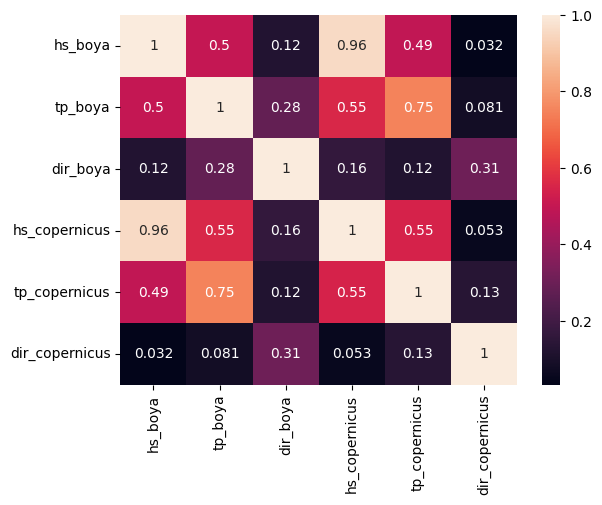

In [34]:
name = 'Bilbao-Vizcaya'
boya, copernicus, _ = get_data(name)

df = pd.DataFrame({'hs_boya': boya.hs,
                   'tp_boya': boya.tp,
                   'dir_boya': boya.dir,
                   'hs_copernicus': copernicus.VHM0,
                   'tp_copernicus': copernicus.VTPK,
                   'dir_copernicus': copernicus.VMDR
                  })
sns.heatmap(data=df.corr(), cbar=True, annot=True)